In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42)

In [8]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((623, 2), (268, 2), (623,), (268,))

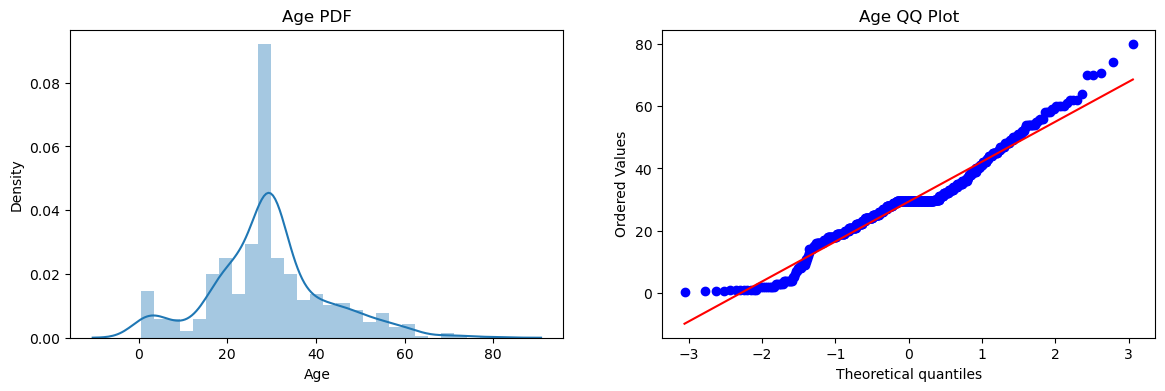

In [12]:


plt.figure(figsize=(14, 4))

# First subplot - Probability Density Function (PDF)
plt.subplot(121)
sns.distplot(xtrain['Age'])
plt.title('Age PDF')

# Second subplot - Quantile-Quantile (QQ) Plot
plt.subplot(122)
stats.probplot(xtrain['Age'], plot=plt)
plt.title('Age QQ Plot')

plt.show()


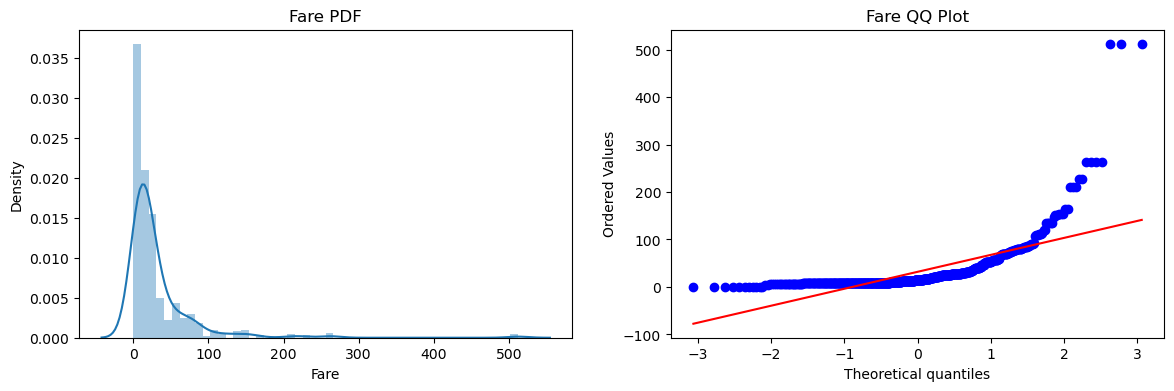

In [13]:

plt.figure(figsize=(14, 4))

# First subplot - Probability Density Function (PDF)
plt.subplot(121)
sns.distplot(xtrain['Fare'])
plt.title('Fare PDF')

# Second subplot - Quantile-Quantile (QQ) Plot
plt.subplot(122)
stats.probplot(xtrain['Fare'], plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [14]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [17]:
clf.fit(xtrain, ytrain)
clf2.fit(xtrain, ytrain)

y_pred = clf.predict(xtest)
y_pred1 = clf2.predict(xtest)



In [19]:
accuracy_lr = accuracy_score(ytest, y_pred)
accuracy_dt = accuracy_score(ytest, y_pred1)

print('Accuracy LR:', accuracy_lr)
print('Accuracy DT:', accuracy_dt)

Accuracy LR: 0.6529850746268657
Accuracy DT: 0.6716417910447762


# Transformer Apply

In [20]:
trf = FunctionTransformer(func=np.log1p)

In [21]:
xtrain_transformed = trf.fit_transform(xtrain)
xtest_transformed = trf.fit_transform(xtest)

In [23]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(xtrain_transformed, ytrain)
clf2.fit(xtrain_transformed, ytrain)
    
y_pred = clf.predict(xtest_transformed)
y_pred1 = clf2.predict(xtest_transformed)
    
print("Accuracy LR",accuracy_score(ytest, y_pred))
print("Accuracy DT",accuracy_score(ytest, y_pred1))

Accuracy LR 0.6791044776119403
Accuracy DT 0.6753731343283582


In [25]:
X_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6577528089887641


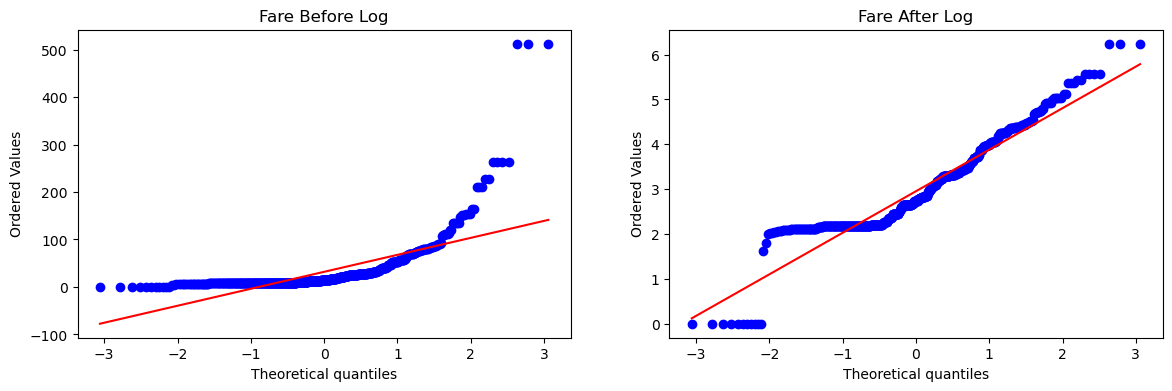

In [27]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(xtrain['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(xtrain_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

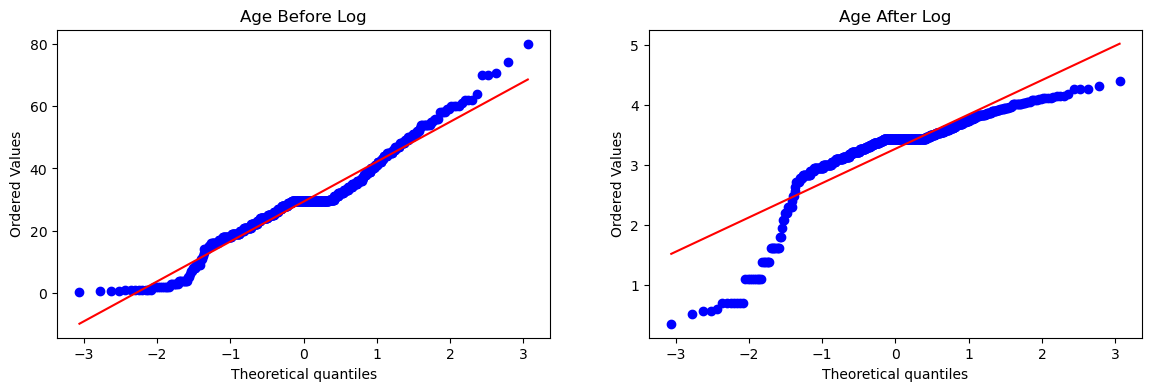

In [28]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(xtrain['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(xtrain_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

After Transform Age Become more worse So that we apply only on 'Fare' column

In [29]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

xtrain_transformed2 = trf2.fit_transform(xtrain)
xtest_transformed2 = trf2.transform(xtest)

In [31]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(xtrain_transformed2, ytrain)
clf2.fit(xtrain_transformed2, ytrain)
    
y_pred = clf.predict(xtest_transformed2)
y_pred2 = clf2.predict(xtest_transformed2)
    
print("Accuracy LR",accuracy_score(ytest,y_pred))
print("Accuracy DT",accuracy_score(ytest,y_pred2))

Accuracy LR 0.664179104477612
Accuracy DT 0.6791044776119403


In [32]:
X_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6599750312109862


In [33]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6195131086142323


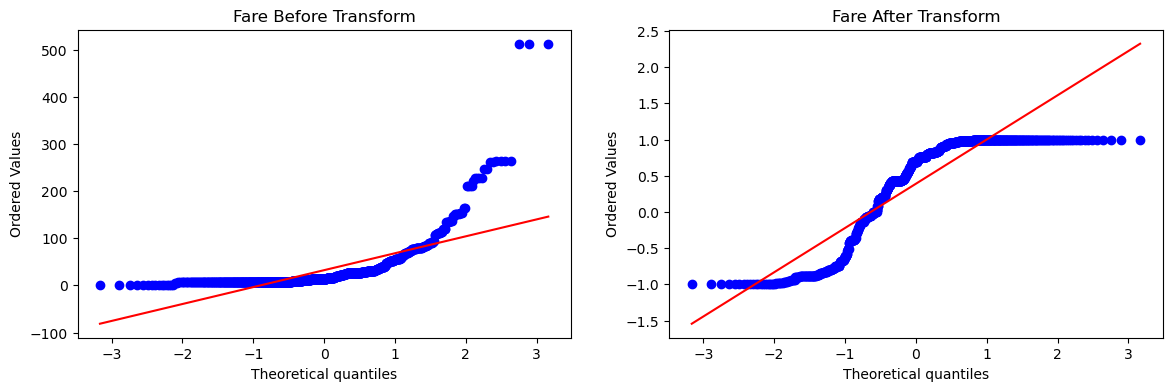

In [34]:
apply_transform(np.sin)